### Linear Regression Model with Medical Cost Dataset

##### 2020710058 Applied Data Science Doo-Yeong Lee

In [41]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Properties Setting
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
# Read Data
df = pd.read_csv('insurance.csv')

#Check Data
print('\n Number of rows and columns in the data set :', df.shape)
print('')
df.head()


 Number of rows and columns in the data set : (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 age + \theta_2 sex + \theta_3 bmi + \theta_4 children + \theta_5 smoker + \theta_6 region }$$

If $\mathbf{i=1}$ then 
$$\mathbf{h_\theta(x_{1}) = \theta_0+\theta_1 19 + \theta_2 female + \theta_3 27.900 + \theta_4 1 + \theta_5 yes + \theta_6 southwest}$$ 
$$\mathbf{y_1 = 16884.92400}$$
If $\mathbf{i=3}$ then $$\mathbf{h_\theta(x_{3}) = \theta_0+\theta_1 28 + \theta_2 male + \theta_3 33.000 + \theta_4 3 + \theta_5 no + \theta_6 northwest}$$ 
$$\mathbf{y_3 = 4449.46200}$$
*Note*: In python index starts from 0.
$$\mathbf{x_1 = \left(\begin{matrix} x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & x_{16}\end{matrix}\right) = \left(\begin{matrix} 19 & female & 27.900 & 1 & no & northwest\end{matrix}\right) }$$

Text(0.5, 1, 'BMI vs Charges')

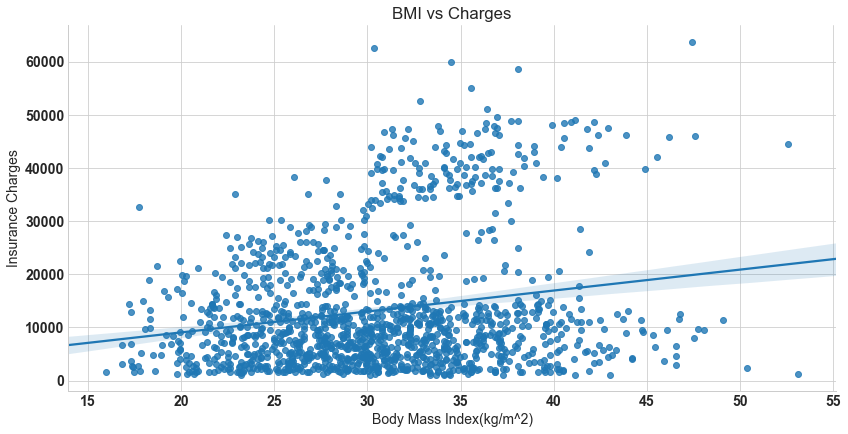

In [38]:
sns.lmplot(x = 'bmi', y = 'charges', data = df, aspect = 2, height = 6)
plt.xlabel('Body Mass Index(kg/m^2)')
plt.ylabel('Insurance Charges')
plt.title('BMI vs Charges')

#### Exploratory data analysis

In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Check Missing Values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


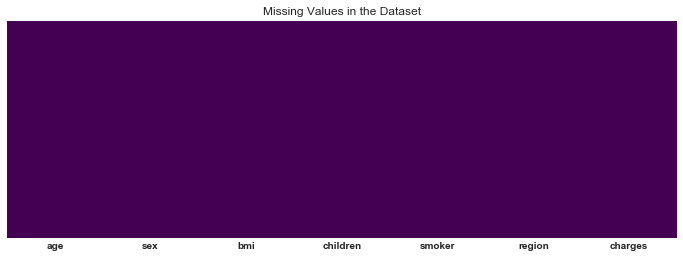

In [28]:
plt.figure(figsize = (12, 4))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Missing Values in the Dataset')
print(df.isnull().sum())

#### Plot

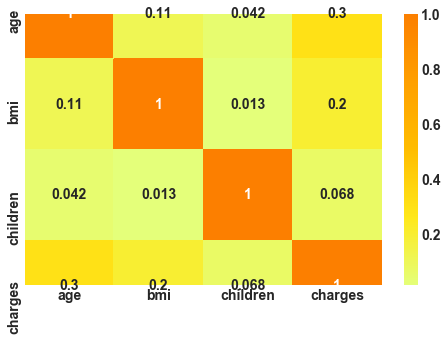

In [42]:
# Correlation Plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot = True)

Text(0.5, 1.0, 'Distribution of insurance charges in $log$ scale')

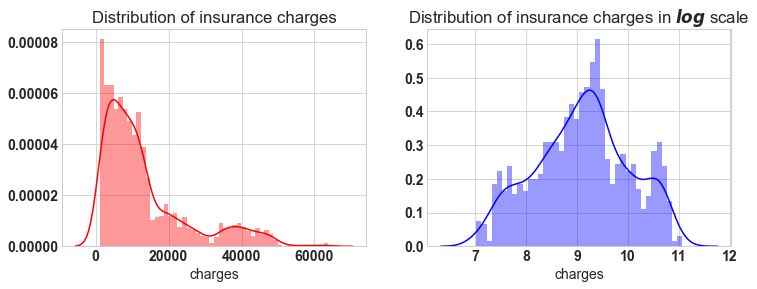

In [50]:
fig = plt.figure(figsize = (12, 4))

ax = fig.add_subplot(121)
sns.distplot(df['charges'], bins = 50, color = 'r', ax = ax)
ax.set_title('Distribution of insurance charges')

ax = fig.add_subplot(122)
sns.distplot(np.log(df['charges']), bins = 40, color = 'b', ax = ax)
ax.set_title('Distribution of insurance charges in $log$ scale')

Text(0.5, 1.0, 'Violin plot of "Smoke vs Charges"')

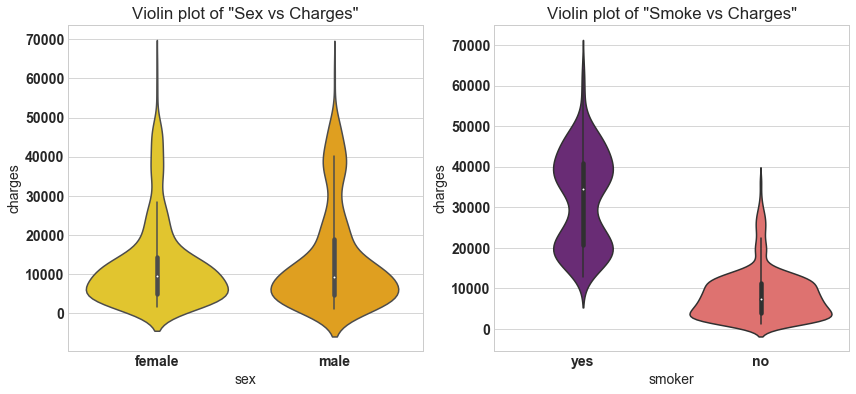

In [63]:
fig = plt.figure(figsize = (14,6))

ax = fig.add_subplot(1,2,1)
sns.violinplot(x = 'sex', y = 'charges', data = df, palette = 'Wistia', ax = ax)
ax.set_title('Violin plot of "Sex vs Charges"')

ax = fig.add_subplot(1,2,2)
sns.violinplot(x = 'smoker', y = 'charges', data = df, palette = 'magma', ax = ax)
ax.set_title('Violin plot of "Smoke vs Charges"')

Text(0.5, 1.0, 'Box plot of "Children vs Charges"')

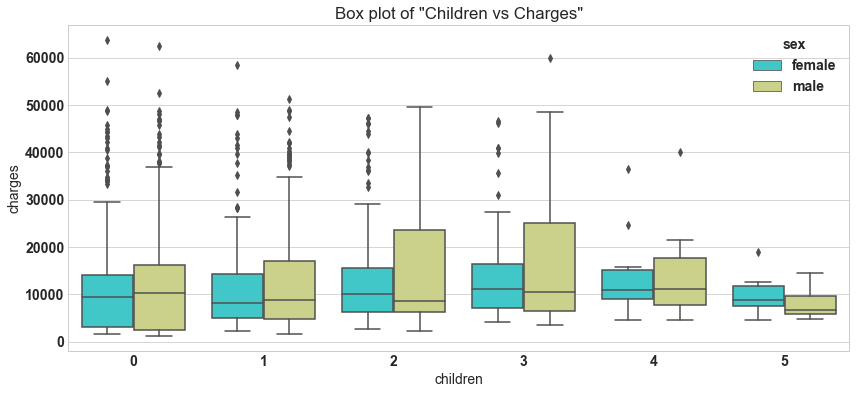

In [66]:
plt.figure(figsize = (14, 6))
sns.boxplot(x = 'children', y = 'charges', hue = 'sex', data = df, palette = 'rainbow')
plt.title('Box plot of "Children vs Charges"')

In [68]:
df.groupby('children').agg(['mean', 'min', 'max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin Plot of "Region vs Charges"')

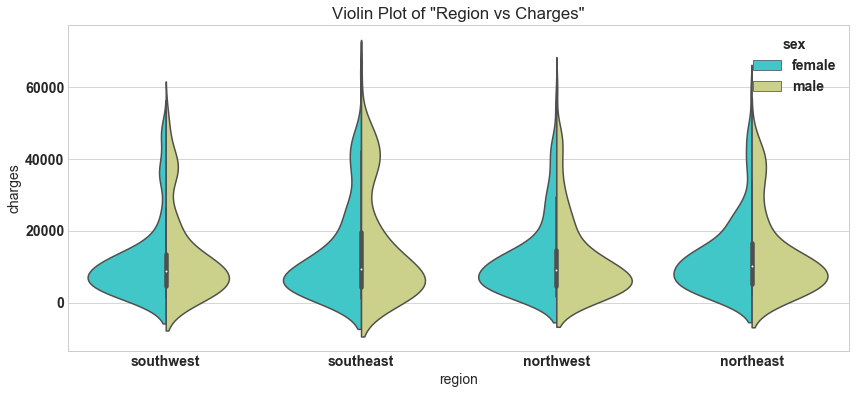

In [74]:
plt.figure(figsize = (14, 6))
sns.violinplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'rainbow', split = True)
plt.title('Violin Plot of "Region vs Charges"')

Text(0.5, 1.0, 'Scatter Plot of "bmi vs Charges"')

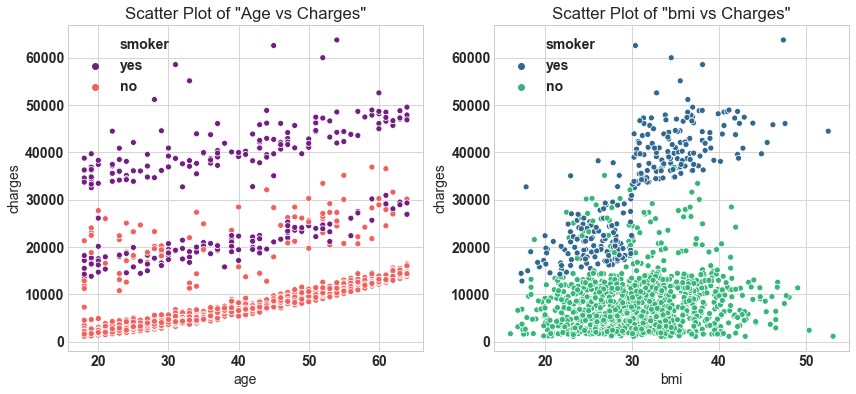

In [81]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(121)
sns.scatterplot(x = 'age', y = 'charges', data = df, palette = 'magma', hue = 'smoker', ax = ax)
ax.set_title('Scatter Plot of "Age vs Charges"')

ax = fig.add_subplot(122)
sns.scatterplot(x = 'bmi', y = 'charges', data = df, palette = 'viridis', hue = 'smoker', ax = ax)
ax.set_title('Scatter Plot of "bmi vs Charges"')

#### Feature Engineering

In [84]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep = '_',
                          columns = categorical_columns, drop_first = True,
                          dtype = 'int8')

In [91]:
print('Columns in original data frame: \n', df.columns.values)
print('\nNumber of rows and columns in the dataset: ', df.shape)
print('\nColumns in data frame after encoding dummy variables: \n', df_encode.columns.values)
print('\nNumber of rows and columns in the dataset: ', df_encode.shape)

Columns in original data frame: 
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset:  (1338, 7)

Columns in data frame after encoding dummy variables: 
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset:  (1338, 13)


In [98]:
# Log transform
df_encode['charges'] = np.log(df_encode['charges'])

#### Train Test Split

In [100]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis = 1)
y = df_encode['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)

#### Model Building

In [104]:
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Columns':columns})
parameter_df

,Columns
0,intersect:x_0=1
1,age
2,bmi
3,OHE_male
4,OHE_1
5,OHE_2
6,OHE_3
7,OHE_4
8,OHE_5
9,OHE_yes


In [107]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Columns,Sklearn_theta
0,intersect:x_0=1,6.935527
1,age,0.034537
2,bmi,0.015038
3,OHE_male,-0.081760
4,OHE_1,0.180544
5,OHE_2,0.322184
6,OHE_3,0.272431
7,OHE_4,0.395786
8,OHE_5,0.407739
9,OHE_yes,1.561728


#### Model Evaluation

In [116]:
# sklearn regression Model
y_pred_sk = lin_reg.predict(X_test)

# Evaluation: MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_pred_sk, y_test)

# R_Square
R_square_sk = lin_reg.score(X_test, y_test)

print('MSE or Theta:', MSE)
print('R-Square:', R_square_sk)

MSE or Theta: 0.23272685836081525
R-Square: 0.7439727440236239
